In [17]:
import pandas as pd
import numpy as np

# Generate a date range for one year
date_range = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")

# Simulate passenger count with some trends and seasonality
np.random.seed(42)
passenger_count = np.abs(5000 + 1000 * np.sin(np.linspace(0, 3.14 * 2, len(date_range))) +
                         np.random.randint(-500, 500, size=len(date_range)))

# Create a DataFrame
df = pd.DataFrame({"date": date_range, "passenger_count": passenger_count})

# Save as CSV
df.to_csv("paris_transport_data.csv", index=False)

print("Dataset 'paris_transport_data.csv' created successfully!")


Dataset 'paris_transport_data.csv' created successfully!


In [18]:
df = pd.read_csv("paris_transport_data.csv")
print(df.head())  # Show first 5 rows
print(df.info())  # Get data summary


         date  passenger_count
0  2023-01-01      4602.000000
1  2023-01-02      4952.251891
2  2023-01-03      5394.498648
3  2023-01-04      4821.735136
4  2023-01-05      4674.956224
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             365 non-null    object 
 1   passenger_count  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


            passenger_count
date                       
2023-01-01      4602.000000
2023-01-02      4952.251891
2023-01-03      5394.498648
2023-01-04      4821.735136
2023-01-05      4674.956224
       passenger_count
count       365.000000
mean       5008.547127
std         750.830655
min        3518.506419
25%        4351.580895
50%        5020.670191
75%        5646.290411
max        6470.130022


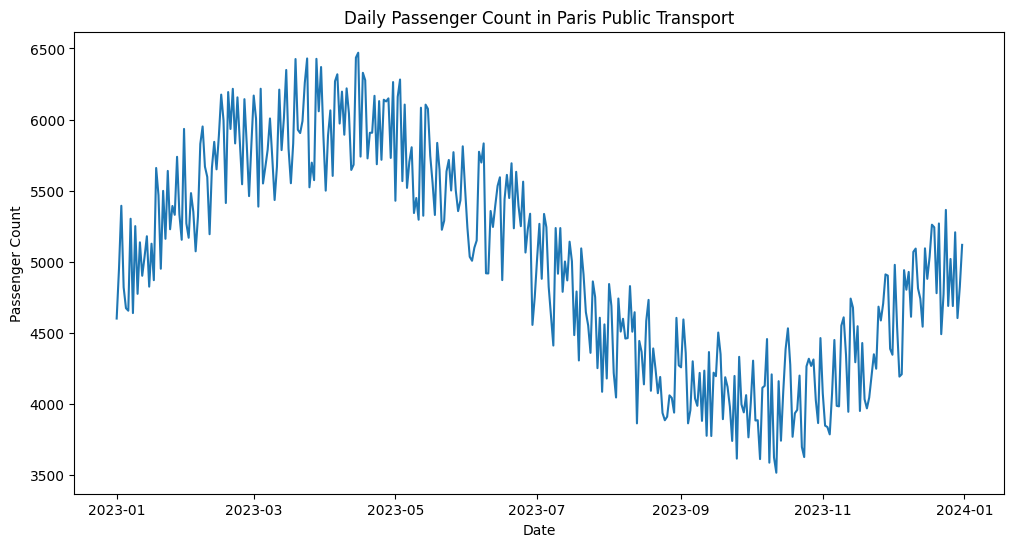

C:\Users\visha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\visha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\visha\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error: 457.458050853116


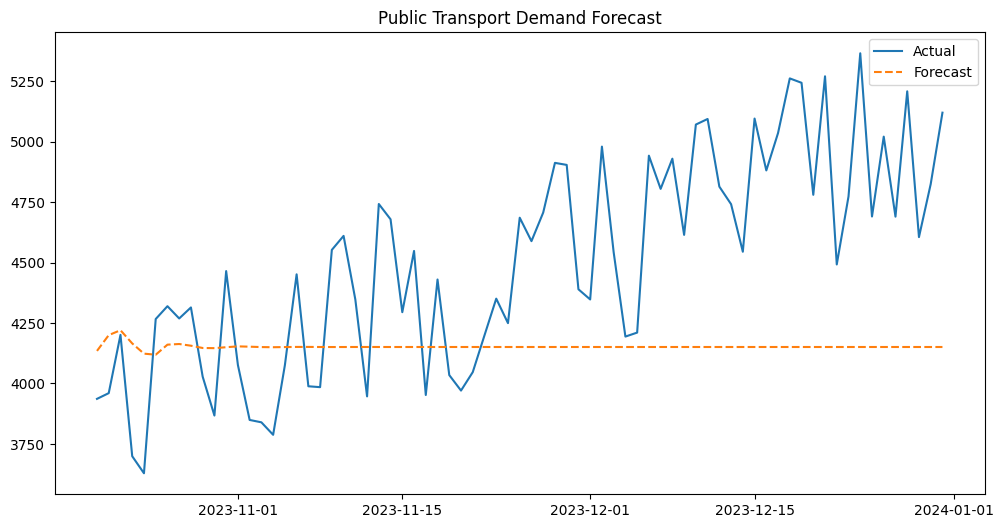

Dataset saved for Power BI/Tableau dashboard.
Project Completed! Results saved.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 1: Load Sample Dataset (Replace with API Calls in Future)
data = pd.read_csv("paris_transport_data.csv")

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Step 2: Data Exploration
print(data.head())
print(data.describe())

# Step 3: Time Series Analysis & Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['passenger_count'])
plt.title("Daily Passenger Count in Paris Public Transport")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.show()

# Step 4: Train-Test Split for Forecasting
train, test = train_test_split(data['passenger_count'], test_size=0.2, shuffle=False)

# Step 5: ARIMA Model for Forecasting
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# Step 6: Evaluate Model Performance
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

# Step 7: Visualizing Predictions
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast", linestyle='dashed')
plt.legend()
plt.title("Public Transport Demand Forecast")
plt.show()

# Step 8: Save Forecasting Results
data['forecast'] = model_fit.predict(start=len(train), end=len(data)-1, dynamic=False)
data.to_csv("transport_forecast_results.csv")

# Step 9: Power BI/Tableau Dashboard Integration
# Save Data for Visualization
data.reset_index().to_csv("transport_data_for_dashboard.csv", index=False)
print("Dataset saved for Power BI/Tableau dashboard.")

print("Project Completed! Results saved.")
